<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/No%20name/DataTable_File2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment: Alternatives to Pandas for Processing Large Datasets (Pandas VS Datatable)**

**Group 7**

Group Members: 


1.   Madina Suraya binti Zharin       A20EC0203
2.   Nur Izzah Mardhiah binti Rashidi A20EC0116
3. Tan Yong Sheng                     A20EC0157
4. Chloe Racquelmae Kennedy           A20EC0026

The Pandas VS Data Table Performance code illustrates how to use Datatable to replace the Pandas API. The sample compares the performance of Pandas and the performance of Datatable for specific dataframe operations.

# Purpose
Datatable is a go-to package for manipulating any large tabular datasets. It is widely used for fast aggregation of large datasets, low latency add/update/remove of columns, quicker ordered joins, and a fast file reader. The distribution provides compatibility and integration with the existing Pandas code. The sample code demonstrates how to perform some basic dataframe operations using Pandas and Datatable. we will compare the performance difference between the two methods.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Big Data - Asg2/Rate.csv'

## Installing Data Table

To use the package, we need to install it first

In [ ]:
!pip install datatable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


After installing, we need to import both pandas and datatable package. Then, it is ready to be used.

In [ ]:
import time
import datatable as dt
print(dt.__version__)

1.0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [ ]:
#pandas
start = time.time()
input_file_name = dataset
pd_df = pd.read_csv(input_file_name)
end = time.time()
print(end - start)

50.083641052246094


In [ ]:
#datatable
start = time.time()
input_file_name = dataset
dt_df = dt.fread(input_file_name)
end = time.time()
print(end - start)

14.960996627807617


## Dataset Properties

### Print dataframe

In [ ]:
#pandas
%time
pd_df.head()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [ ]:
#datatable
%time
dt_df.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,14
1,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,15
4,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,16
5,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,94.5,126.95,126.95,126.95,17
7,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,17
8,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,18


### Process dataframe time

In [ ]:
#pandas
%time
type(pd_df)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs


pandas.core.frame.DataFrame

In [ ]:
#datatable
%time
type(dt_df)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


datatable.Frame

### Get dataframe shape

In [ ]:
#pandas
%time
pd_df.shape

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


(12694445, 24)

In [ ]:
#datatable
%time
dt_df.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


(12694445, 24)

### Get column names

In [ ]:
#pandas
%time
pd_df.columns

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age',
       'IndividualRate', 'IndividualTobaccoRate', 'Couple',
       'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents',
       'RowNumber'],
      dtype='object')

In [ ]:
#datatable
%time
dt_df.names

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


('BusinessYear',
 'StateCode',
 'IssuerId',
 'SourceName',
 'VersionNum',
 'ImportDate',
 'IssuerId2',
 'FederalTIN',
 'RateEffectiveDate',
 'RateExpirationDate',
 'PlanId',
 'RatingAreaId',
 'Tobacco',
 'Age',
 'IndividualRate',
 'IndividualTobaccoRate',
 'Couple',
 'PrimarySubscriberAndOneDependent',
 'PrimarySubscriberAndTwoDependents',
 'PrimarySubscriberAndThreeOrMoreDependents',
 'CoupleAndOneDependent',
 'CoupleAndTwoDependents',
 'CoupleAndThreeOrMoreDependents',
 'RowNumber')

### Get column types

In [ ]:
#pandas
%time
pd_df.dtypes

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
VersionNum                                     int64
ImportDate                                    object
IssuerId2                                      int64
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            f

In [ ]:
#datatable
%time
dt_df.stypes

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


(stype.int32,
 stype.str32,
 stype.int32,
 stype.str32,
 stype.int32,
 stype.time64,
 stype.int32,
 stype.str32,
 stype.date32,
 stype.date32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.float64,
 stype.int32)

### Looking at the number of unique values per columns

In [ ]:
#pandas
%time
pd_df.nunique()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


BusinessYear                                      3
StateCode                                        39
IssuerId                                        910
SourceName                                        3
VersionNum                                       23
ImportDate                                      266
IssuerId2                                       910
FederalTIN                                      335
RateEffectiveDate                                14
RateExpirationDate                               26
PlanId                                        16808
RatingAreaId                                     67
Tobacco                                           2
Age                                              47
IndividualRate                               149181
IndividualTobaccoRate                        153930
Couple                                         5533
PrimarySubscriberAndOneDependent               5974
PrimarySubscriberAndTwoDependents              7047
PrimarySubsc

In [ ]:
#datatable
%time
dt_df.nunique()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,3,39,910,3,23,266,910,335,14,26,…,7632,7268,7733,8197,60444


## Data Slicing

In [ ]:
#pandas
%time
pd_df.iloc[0:10,0:4]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


,BusinessYear,StateCode,IssuerId,SourceName
0,2014,AK,21989,HIOS
1,2014,AK,21989,HIOS
2,2014,AK,21989,HIOS
3,2014,AK,21989,HIOS
4,2014,AK,21989,HIOS
5,2014,AK,21989,HIOS
6,2014,AK,21989,HIOS
7,2014,AK,21989,HIOS
8,2014,AK,21989,HIOS
9,2014,AK,21989,HIOS


In [ ]:
#datatable
%time
dt_df[0:10,0:4]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


,BusinessYear,StateCode,IssuerId,SourceName
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,2014,AK,21989,HIOS
1,2014,AK,21989,HIOS
2,2014,AK,21989,HIOS
3,2014,AK,21989,HIOS
4,2014,AK,21989,HIOS
5,2014,AK,21989,HIOS
6,2014,AK,21989,HIOS
7,2014,AK,21989,HIOS
8,2014,AK,21989,HIOS


## Data Filtering

In [ ]:
from datatable import *

Filter out the data where the Business Year data is 2015

In [ ]:
#pandas
%time
year_pd = pd_df.loc[pd_df.BusinessYear == 2015,:]
year_pd.head(5)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
3796388,2015,AK,21989,HIOS,4,2014-08-08 08:53:29,21989,93-0438772,2015-01-01,2015-12-31,...,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
3796389,2015,AK,21989,HIOS,4,2014-08-08 08:53:29,21989,93-0438772,2015-01-01,2015-12-31,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3796390,2015,AK,21989,HIOS,4,2014-08-08 08:53:29,21989,93-0438772,2015-01-01,2015-12-31,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3796391,2015,AK,21989,HIOS,4,2014-08-08 08:53:29,21989,93-0438772,2015-01-01,2015-12-31,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
3796392,2015,AK,21989,HIOS,4,2014-08-08 08:53:29,21989,93-0438772,2015-01-01,2015-12-31,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18


In [ ]:
#datatable
%time
year_dt = dt_df[f.BusinessYear == 2015,:]
year_dt.head(5)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2015,AK,21989,HIOS,4,2014-08-08T08:53:29,21989,93-0438772,2015-01-01,2015-12-31,…,NA,NA,NA,NA,14
1,2015,AK,21989,HIOS,4,2014-08-08T08:53:29,21989,93-0438772,2015-01-01,2015-12-31,…,NA,NA,NA,NA,15
2,2015,AK,21989,HIOS,4,2014-08-08T08:53:29,21989,93-0438772,2015-01-01,2015-12-31,…,NA,NA,NA,NA,16
3,2015,AK,21989,HIOS,4,2014-08-08T08:53:29,21989,93-0438772,2015-01-01,2015-12-31,…,NA,NA,NA,NA,17
4,2015,AK,21989,HIOS,4,2014-08-08T08:53:29,21989,93-0438772,2015-01-01,2015-12-31,…,NA,NA,NA,NA,18


## Data Aggregation

Find the average of Individual Rate based on the Age

In [ ]:
#pandas
%time
avgIndividualRate_pd = pd_df.groupby('Age')['IndividualRate'].mean()
avgIndividualRate_pd

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Age
0-20              122.255943
21               4082.839038
22               4082.905627
23               4082.984625
24               4083.077782
25               4083.623758
26               4087.140988
27               4091.294937
28               4097.991162
29               4103.554397
30               4106.364008
31               4110.545405
32               4114.726973
33               4117.351338
34               4120.145218
35               4121.613227
36               4123.018255
37               4124.441330
38               4125.875228
39               4128.692732
40               4131.558552
41               4135.775540
42               4139.825581
43               4145.446150
44               4152.453902
45               4160.829374
46               4170.626083
47               4181.616742
48               4194.177860
49               4206.558343
50               4220.548507
51               4234.320766
52               4249.475860
53               4264.807679
54        

In [ ]:
#datatable
%time 
avgIndividualRate_dt = dt_df[:,dt.mean(f.IndividualRate),dt.by(f.Age)]
avgIndividualRate_dt

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


,Age,IndividualRate
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,0-20,122.256
1,21,4082.84
2,22,4082.91
3,23,4082.98
4,24,4083.08
5,25,4083.62
6,26,4087.14
7,27,4091.29
8,28,4097.99


## Data Sorting

Sort the data based on Age (increasing)

In [ ]:
#pandas
%time
sortedDataAsc_pd = pd_df.sort_values(by=['Age'])
sortedDataAsc_pd.head(3)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
5770311,2015,SC,49532,HIOS,20,2015-01-16 17:32:32,49532,57-0768835,2015-01-01,2015-03-31,...,175.32,210.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30650
5770310,2015,SC,49532,HIOS,20,2015-01-16 17:32:32,49532,57-0768835,2015-04-01,2015-06-30,...,176.85,212.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30650


In [ ]:
#datatable
%time
sortedDataDesc_dt = dt_df[:,:,dt.sort(f.Age)]
sortedDataDesc_dt.head(3)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,14
1,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,60
2,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,106


Sort the data based on Age (decreasing)

In [ ]:
#pandas
%time
sortedDataDesc_pd = pd_df.sort_values(by='Age', ascending=False)
sortedDataDesc_pd.head(3)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
10631304,2016,SC,97325,HIOS,2,2015-06-30 02:19:14,97325,47-0397286,2016-10-01,2016-12-31,...,27.91,NaN,27.91,27.91,27.91,27.91,27.91,27.91,27.91,87
530424,2014,FL,48129,HIOS,8,2013-11-26 13:14:08,48129,47-0397286,2014-10-01,2014-12-31,...,30.00,NaN,30.00,30.00,30.00,30.00,30.00,30.00,30.00,65
530439,2014,FL,48129,HIOS,8,2013-11-26 13:14:08,48129,47-0397286,2014-07-01,2014-09-30,...,29.74,NaN,29.74,29.74,29.74,29.74,29.74,29.74,29.74,66


In [ ]:
#datatable
%time
sortedDataDesc_dt = dt_df[:,:,dt.sort(-f.Age)]
sortedDataDesc_dt.head(3)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,14
1,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,15
2,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,16


## Comparison of Pandas and DataTable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

index = ['Read data (seconds)','Print dataframe','Process dataframe','Dataframe shape',
           'Column names','Column types','Unique values','Data Slicing',
           'Data Filtering','Data Aggregation','Sort (ascending)','Sort (descending)']
pandas_col = [50.08, 7.87, 7.63, 7.87, 7.15, 7.63, 8.34, 7.63, 8.34, 7.63, 8.34, 7.15]
datatable_col = [14.96, 5.72, 5.96, 9.06, 9.06, 9.06, 5.72, 8.11, 8.11, 8.82, 10, 8.58]

value = pd.DataFrame({'Pandas':pandas_col, 'DataTable':datatable_col},index = index)
value

,Pandas,DataTable
Read data (seconds),50.08,14.96
Print dataframe,7.87,5.72
Process dataframe,7.63,5.96
Dataframe shape,7.87,9.06
Column names,7.15,9.06
Column types,7.63,9.06
Unique values,8.34,5.72
Data Slicing,7.63,8.11
Data Filtering,8.34,8.11
Data Aggregation,7.63,8.82


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

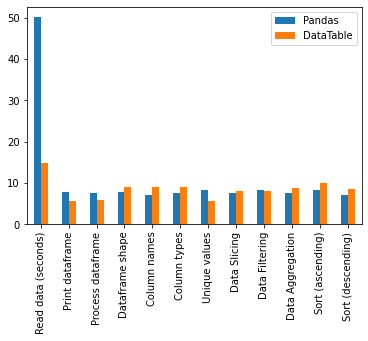

In [ ]:
ax = value.plot.bar(rot=0)
plt.xticks(rotation=90)

According to the bar graphs above, there are a few processes where DataTable execute faster than Pandas which are read data, printing dataframe, process dataframe time, getting unique values. 

Besides, there is a small difference in execution time for data filtering where DataTable is 8.11 µs while Pandas is 8.34 µs.

The process with largest different in exection time would be looking for unique values for each columns where Pandas takes 8.34 µs while DataTable only takes 5.72 µs to process the result. 

Other than that, the remaining processes all shows longer execution time for DataTable compared to Pandas. The longest execution time (10 µs) that DataTable took to process is to sort the data based on age in an increasing order.

In conclusion, faster execution time indicates better performance. DataTable has better performance than Pandas in terms of reading data. 